# MideaPipe

## Importing Libraries

In [27]:
import os
from typing import Mapping, Tuple

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from mediapipe.python.solutions import hands_connections
from mediapipe.python.solutions.drawing_styles import DrawingSpec
from mediapipe.python.solutions.hands import HandLandmark

import mediapipe as mp

## Reading Data

In [2]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

In [3]:
def resize_and_show_image(image, which="plt"):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    if which == "cv2":
        cv2.imshow(name, img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        plt.figure(figsize = (7,7))
        plt.imshow(img)

In [4]:
def show_images(images):

    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for index, (name, image) in enumerate(images.items()):
        plt.subplot(3,10, index+1)
        plt.xticks([])
        plt.yticks([])
        h, w = image.shape[:2]
        if h < w:
            img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
        else:
            img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
        # cv2.imshow(name, img)
        # cv2.waitKey(1000)
        # cv2.destroyAllWindows()
        plt.imshow(img)
        plt.xlabel(name)


In [5]:
DATA_DIR = '../data/asl-alphabet/asl_alphabet_test/asl_alphabet_test/'

## Displaying Images

<Figure size 640x480 with 0 Axes>

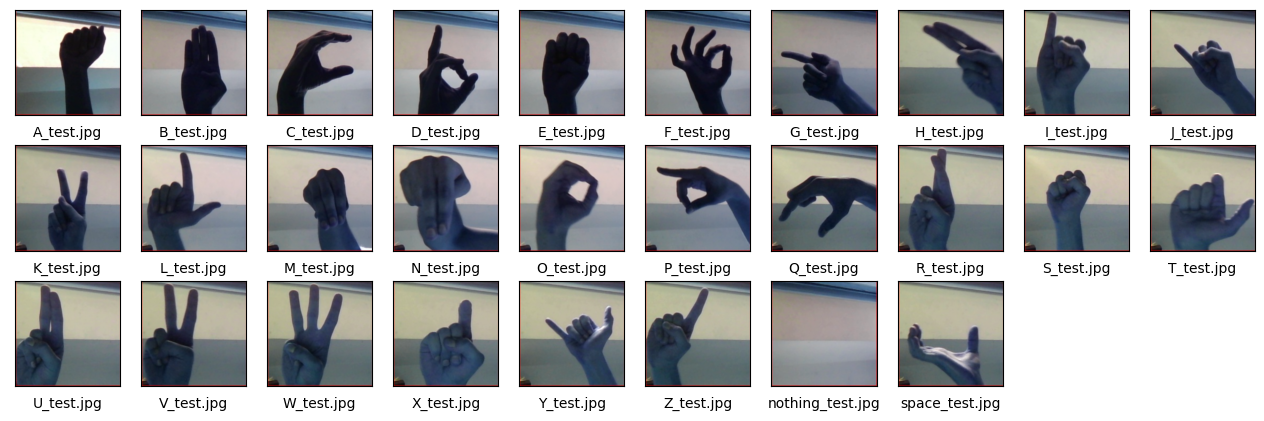

In [6]:
images = {name: cv2.imread(os.path.join(DATA_DIR,name)) for name in sorted(os.listdir(DATA_DIR))}

show_images(images)

## MediaPipe

In [7]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [8]:
help(mp_hands.Hands)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  Hands(static_image_mode=False, max_num_hands=2, model_complexity=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.ob

In [28]:
_RADIUS = 5
_RED = (48, 48, 255)
_GREEN = (48, 255, 48)
_BLUE = (192, 101, 21)
_YELLOW = (0, 204, 255)
_GRAY = (128, 128, 128)
_PURPLE = (128, 64, 128)
_PEACH = (180, 229, 255)
_WHITE = (224, 224, 224)

# Hands
_THICKNESS_WRIST_MCP = 3
_THICKNESS_FINGER = 2
_THICKNESS_DOT = -1

In [29]:
# Hand landmarks
_PALM_LANMARKS = (HandLandmark.WRIST, HandLandmark.THUMB_CMC,
                  HandLandmark.INDEX_FINGER_MCP, HandLandmark.MIDDLE_FINGER_MCP,
                  HandLandmark.RING_FINGER_MCP, HandLandmark.PINKY_MCP)
_THUMP_LANDMARKS = (HandLandmark.THUMB_MCP, HandLandmark.THUMB_IP,
                    HandLandmark.THUMB_TIP)
_INDEX_FINGER_LANDMARKS = (HandLandmark.INDEX_FINGER_PIP,
                           HandLandmark.INDEX_FINGER_DIP,
                           HandLandmark.INDEX_FINGER_TIP)
_MIDDLE_FINGER_LANDMARKS = (HandLandmark.MIDDLE_FINGER_PIP,
                            HandLandmark.MIDDLE_FINGER_DIP,
                            HandLandmark.MIDDLE_FINGER_TIP)
_RING_FINGER_LANDMARKS = (HandLandmark.RING_FINGER_PIP,
                          HandLandmark.RING_FINGER_DIP,
                          HandLandmark.RING_FINGER_TIP)
_PINKY_FINGER_LANDMARKS = (HandLandmark.PINKY_PIP, HandLandmark.PINKY_DIP,
                           HandLandmark.PINKY_TIP)

In [30]:
_HAND_LANDMARK_STYLE = {
    _PALM_LANMARKS:
        DrawingSpec(
            color=_RED, thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
    _THUMP_LANDMARKS:
        DrawingSpec(
            color=_PEACH, thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
    _INDEX_FINGER_LANDMARKS:
        DrawingSpec(
            color=_PURPLE, thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
    _MIDDLE_FINGER_LANDMARKS:
        DrawingSpec(
            color=_YELLOW, thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
    _RING_FINGER_LANDMARKS:
        DrawingSpec(
            color=_GREEN, thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
    _PINKY_FINGER_LANDMARKS:
        DrawingSpec(
            color=_BLUE, thickness=_THICKNESS_DOT, circle_radius=_RADIUS),
}

In [31]:
# Hands connections
_HAND_CONNECTION_STYLE = {
    hands_connections.HAND_PALM_CONNECTIONS:
        DrawingSpec(color=_GRAY, thickness=_THICKNESS_WRIST_MCP),
    hands_connections.HAND_THUMB_CONNECTIONS:
        DrawingSpec(color=_PEACH, thickness=_THICKNESS_FINGER),
    hands_connections.HAND_INDEX_FINGER_CONNECTIONS:
        DrawingSpec(color=_PURPLE, thickness=_THICKNESS_FINGER),
    hands_connections.HAND_MIDDLE_FINGER_CONNECTIONS:
        DrawingSpec(color=_YELLOW, thickness=_THICKNESS_FINGER),
    hands_connections.HAND_RING_FINGER_CONNECTIONS:
        DrawingSpec(color=_GREEN, thickness=_THICKNESS_FINGER),
    hands_connections.HAND_PINKY_FINGER_CONNECTIONS:
        DrawingSpec(color=_BLUE, thickness=_THICKNESS_FINGER)
}

In [33]:
def get_hand_landmarks_style() -> Mapping[int, DrawingSpec]:
    """Returns the default hand landmarks drawing style.

    Returns:
        A mapping from each hand landmark to its default drawing spec.
    """
    hand_landmark_style = {}
    for k, v in _HAND_LANDMARK_STYLE.items():
        for landmark in k:
            hand_landmark_style[landmark] = v
    return hand_landmark_style

def get_hand_connections_style(
) -> Mapping[Tuple[int, int], DrawingSpec]:
    """Returns the default hand connections drawing style.

    Returns:
        A mapping from each hand connection to its default drawing spec.
    """
    hand_connection_style = {}
    for k, v in _HAND_CONNECTION_STYLE.items():
        for connection in k:
            hand_connection_style[connection] = v
    return hand_connection_style

Image: A
Handedness: None
No Landmark Found for A

Image: B
Handedness: [classification {
  index: 0
  score: 0.9810854196548462
  label: "Left"
}
]


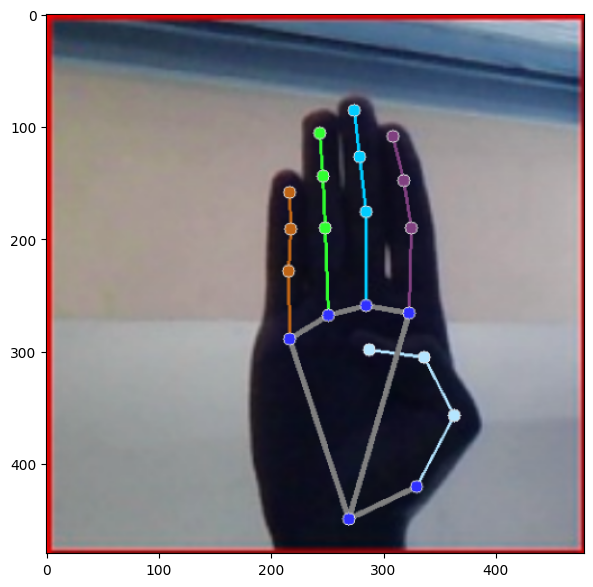

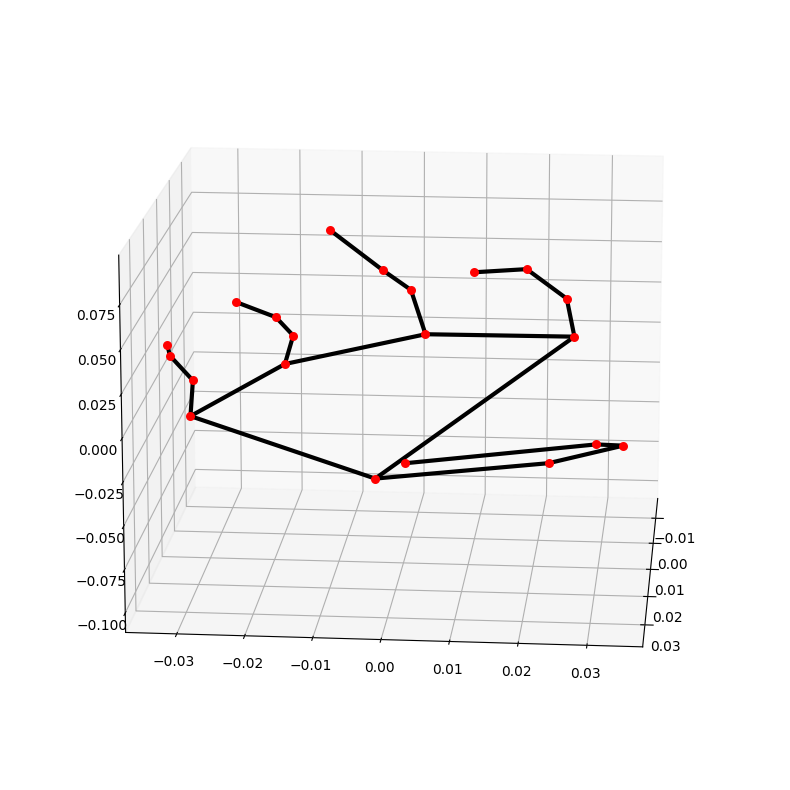

Image: C
Handedness: None
No Landmark Found for C

Image: D
Handedness: None
No Landmark Found for D

Image: E
Handedness: None
No Landmark Found for E

Image: F
Handedness: [classification {
  index: 0
  score: 0.965901255607605
  label: "Left"
}
]


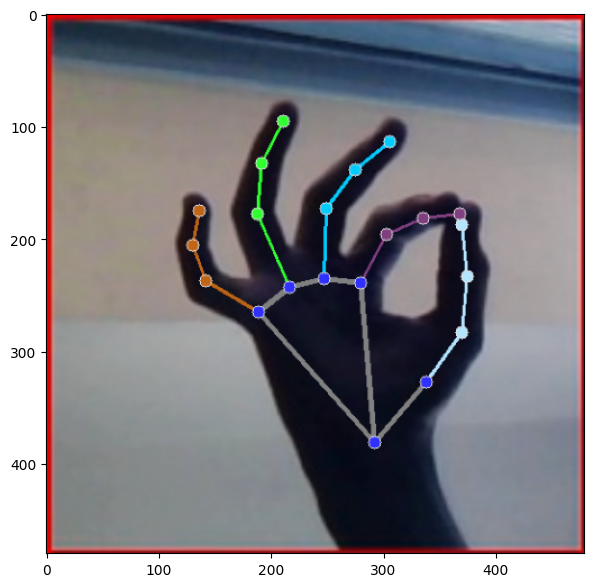

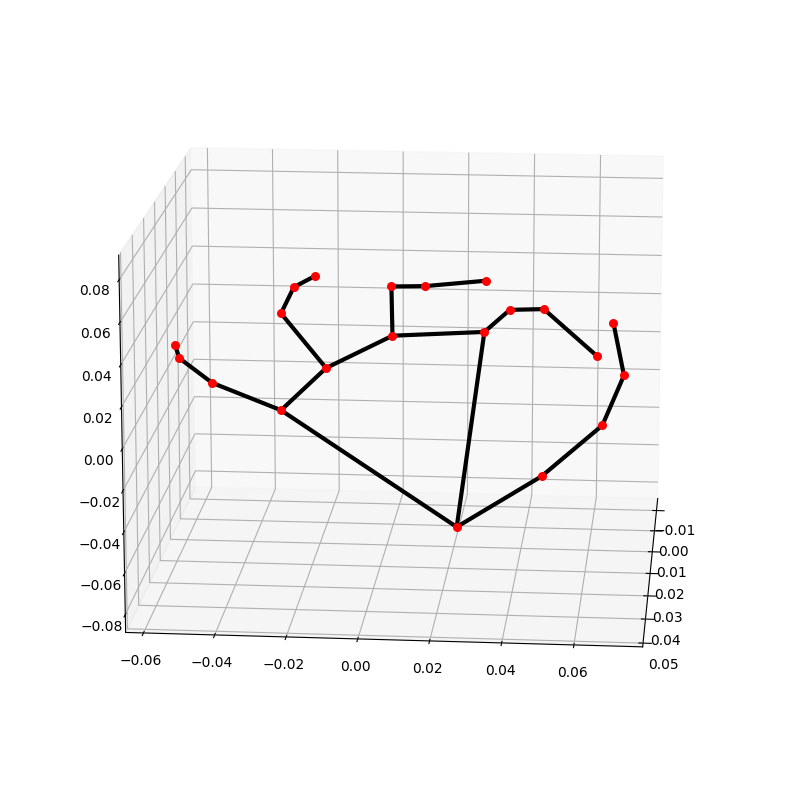

Image: G
Handedness: [classification {
  index: 0
  score: 0.9987691640853882
  label: "Left"
}
]


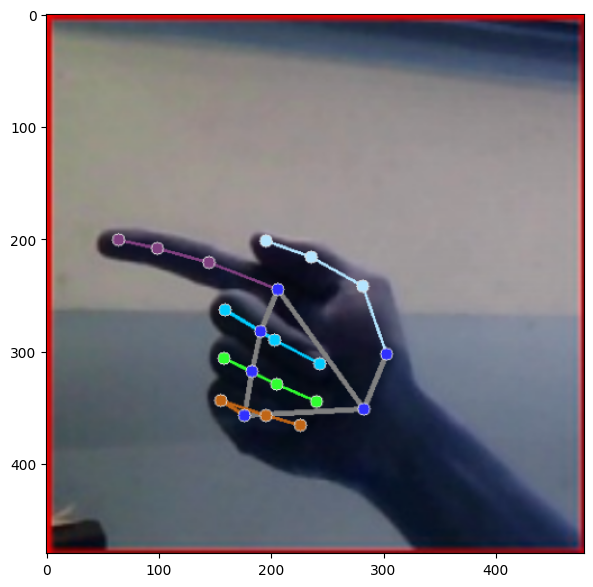

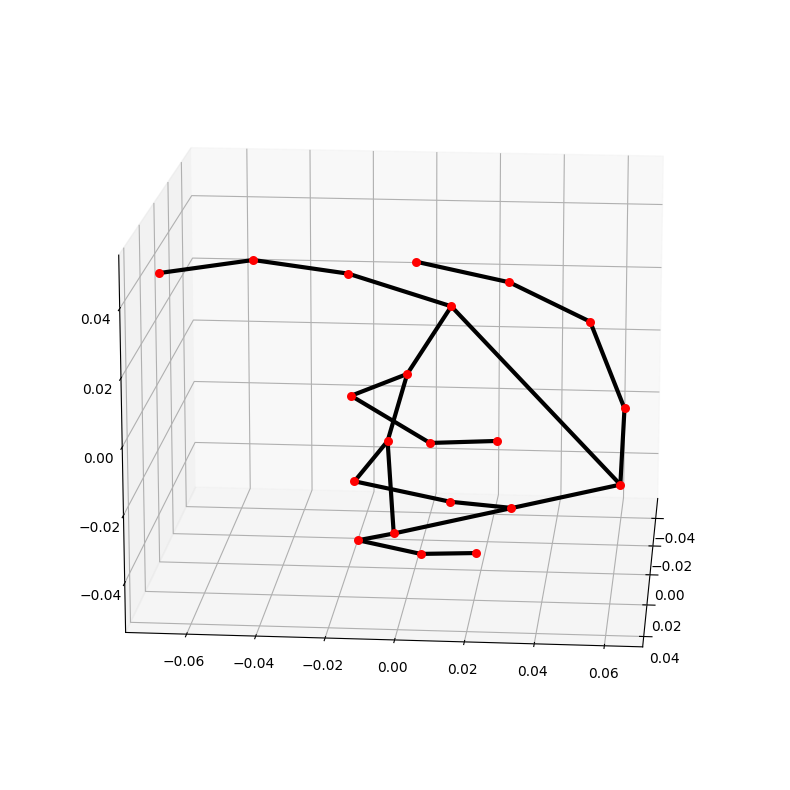

Image: H
Handedness: None
No Landmark Found for H

Image: I
Handedness: [classification {
  index: 0
  score: 0.9957945346832275
  label: "Left"
}
]


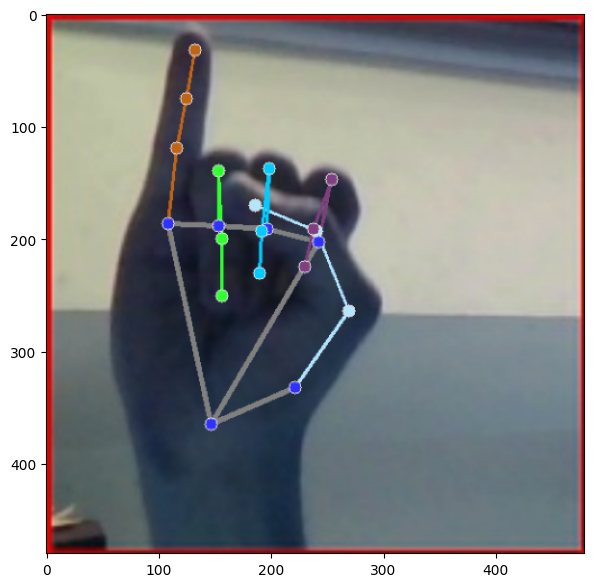

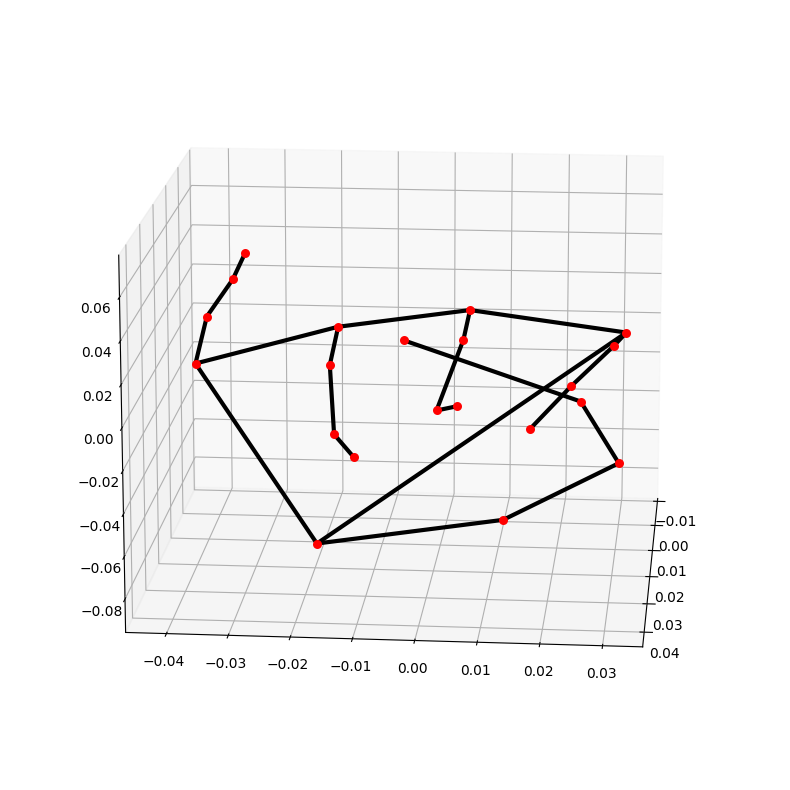

Image: J
Handedness: [classification {
  index: 0
  score: 0.9988489151000977
  label: "Left"
}
]


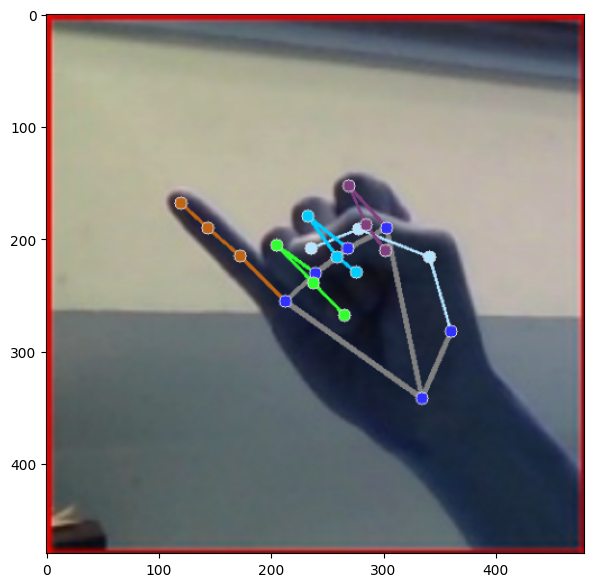

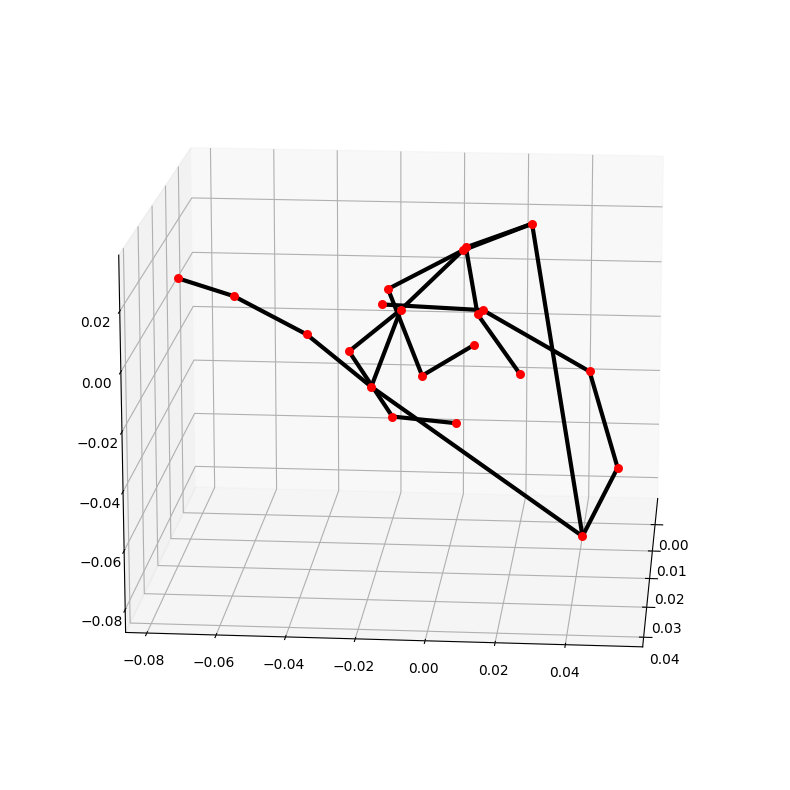

Image: K
Handedness: [classification {
  index: 0
  score: 0.9982500076293945
  label: "Left"
}
]


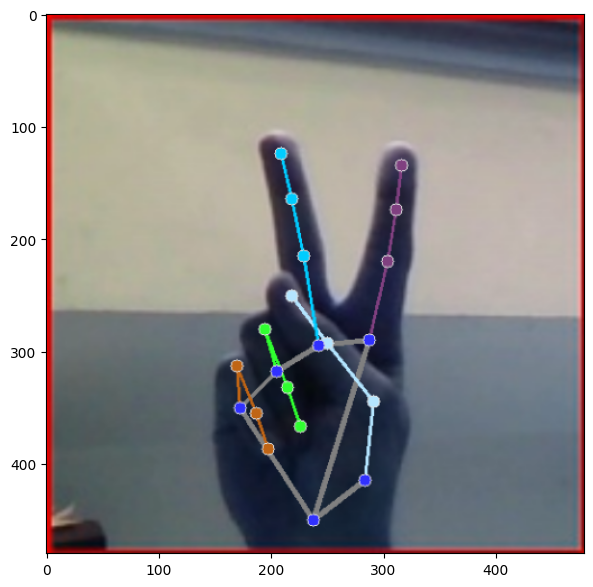

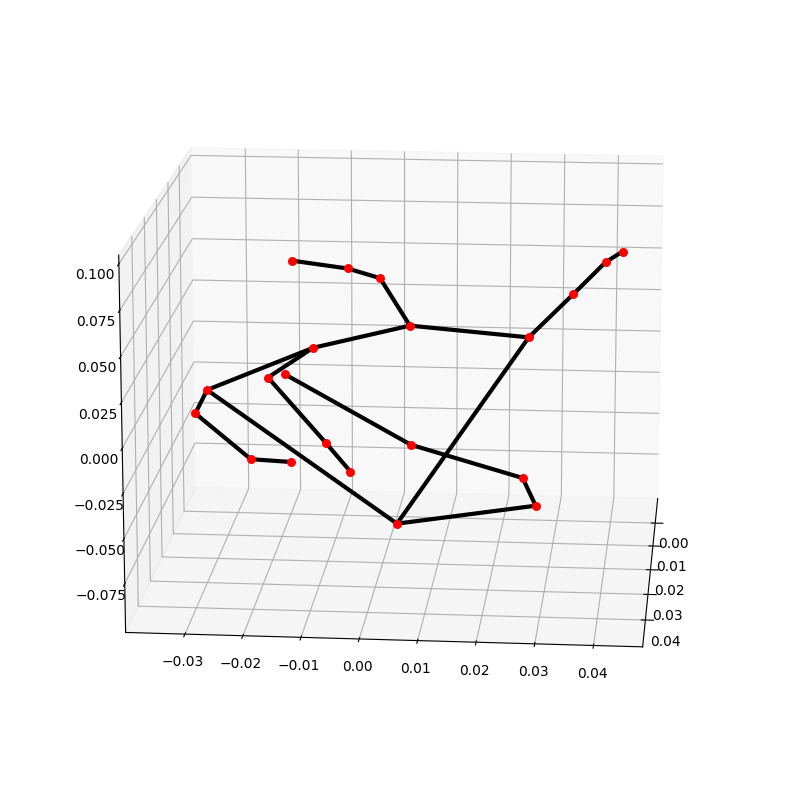

Image: L
Handedness: [classification {
  index: 0
  score: 0.9943479895591736
  label: "Left"
}
]


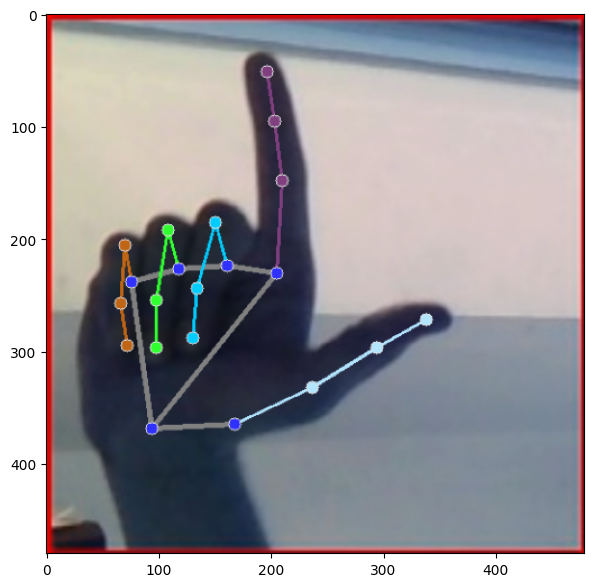

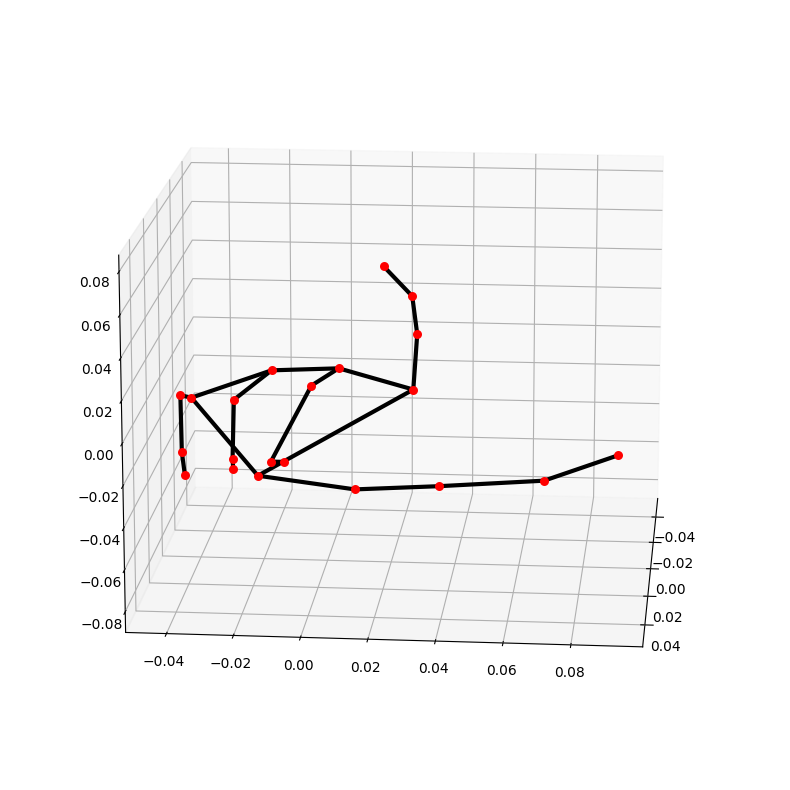

Image: M
Handedness: None
No Landmark Found for M

Image: N
Handedness: None
No Landmark Found for N

Image: O
Handedness: [classification {
  index: 0
  score: 0.9910147190093994
  label: "Left"
}
]


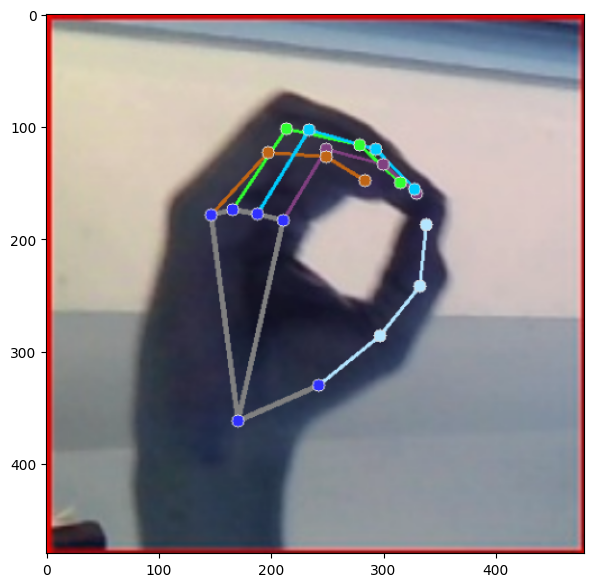

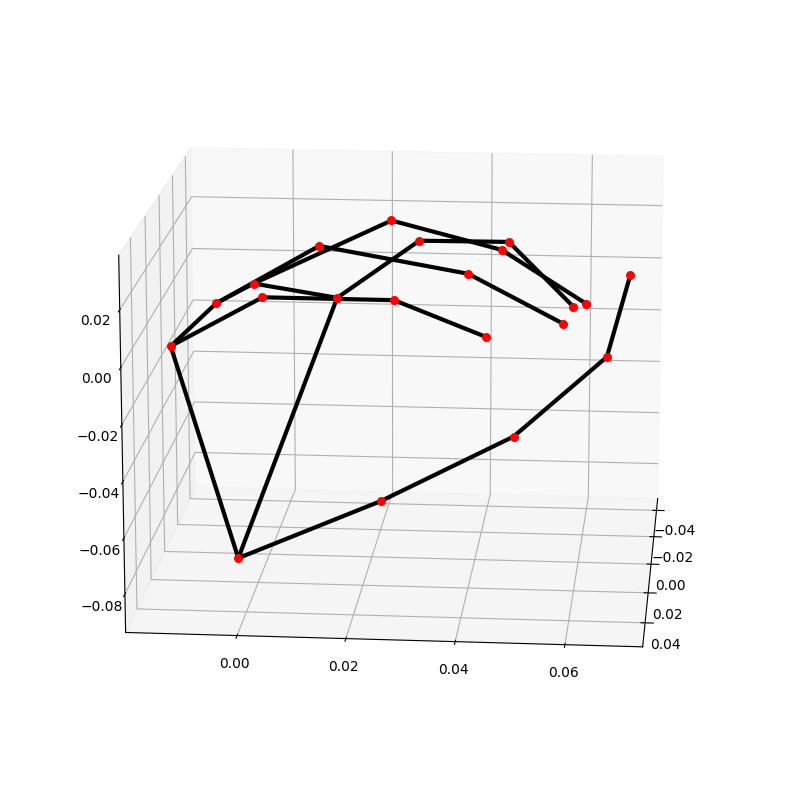

Image: P
Handedness: [classification {
  index: 0
  score: 0.9885299205780029
  label: "Left"
}
]


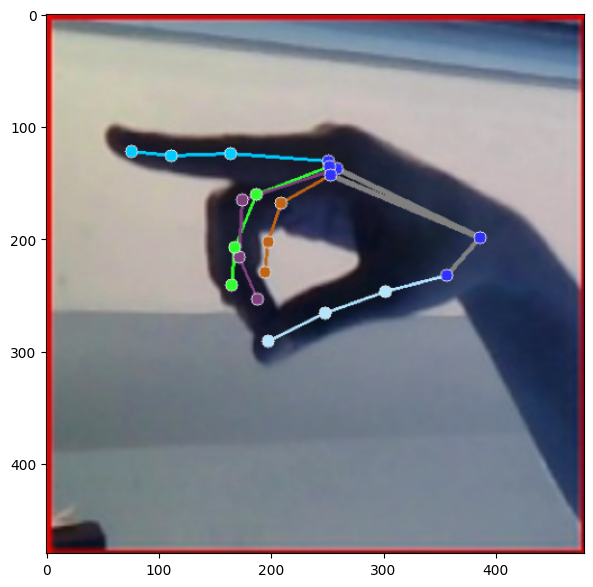

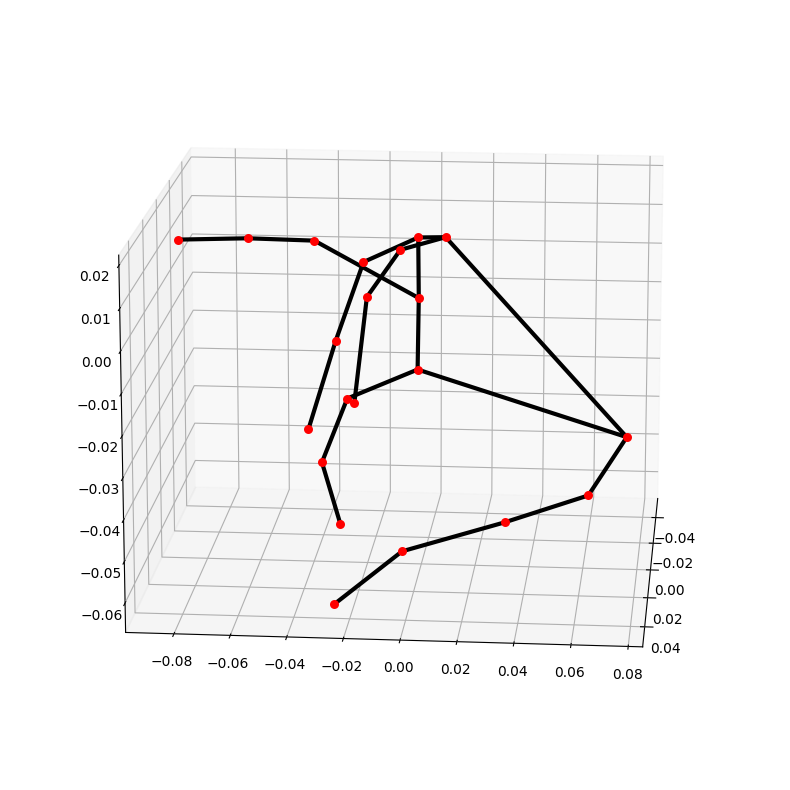

Image: Q
Handedness: [classification {
  index: 0
  score: 0.963562548160553
  label: "Left"
}
]


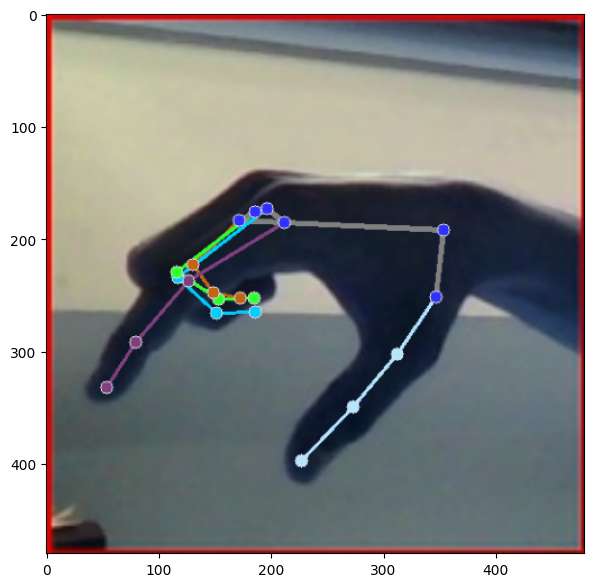

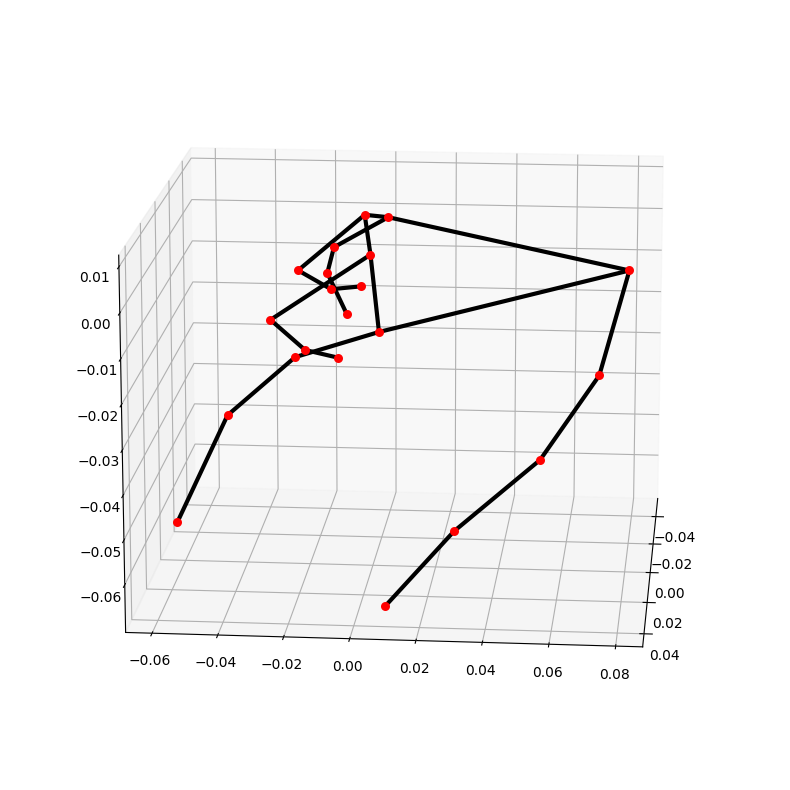

Image: R
Handedness: None
No Landmark Found for R

Image: S
Handedness: [classification {
  index: 0
  score: 0.9976761341094971
  label: "Left"
}
]


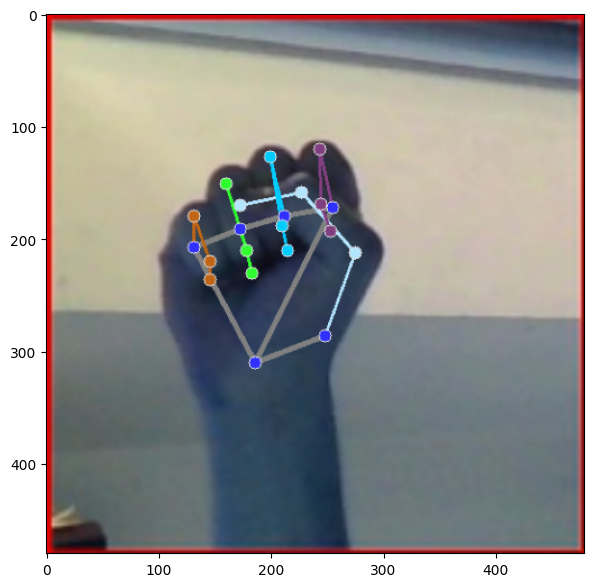

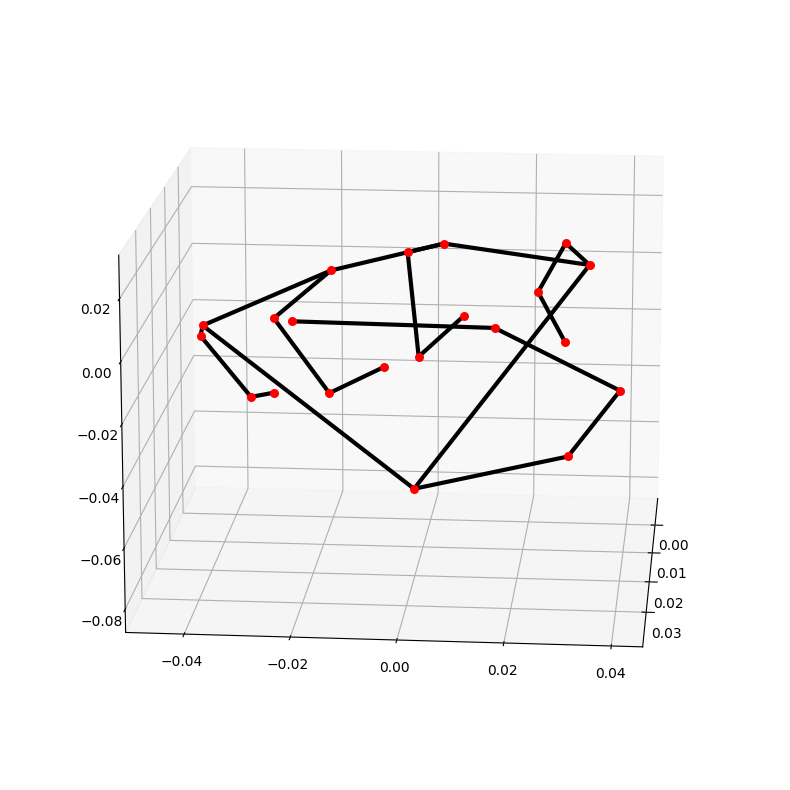

Image: T
Handedness: [classification {
  index: 0
  score: 0.9966225028038025
  label: "Left"
}
]


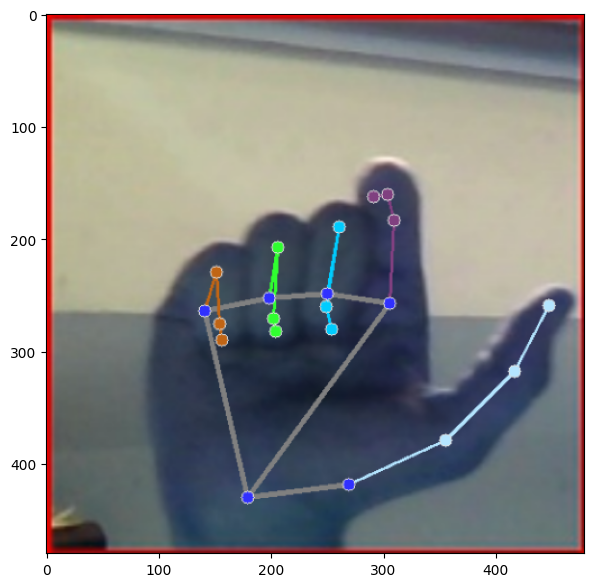

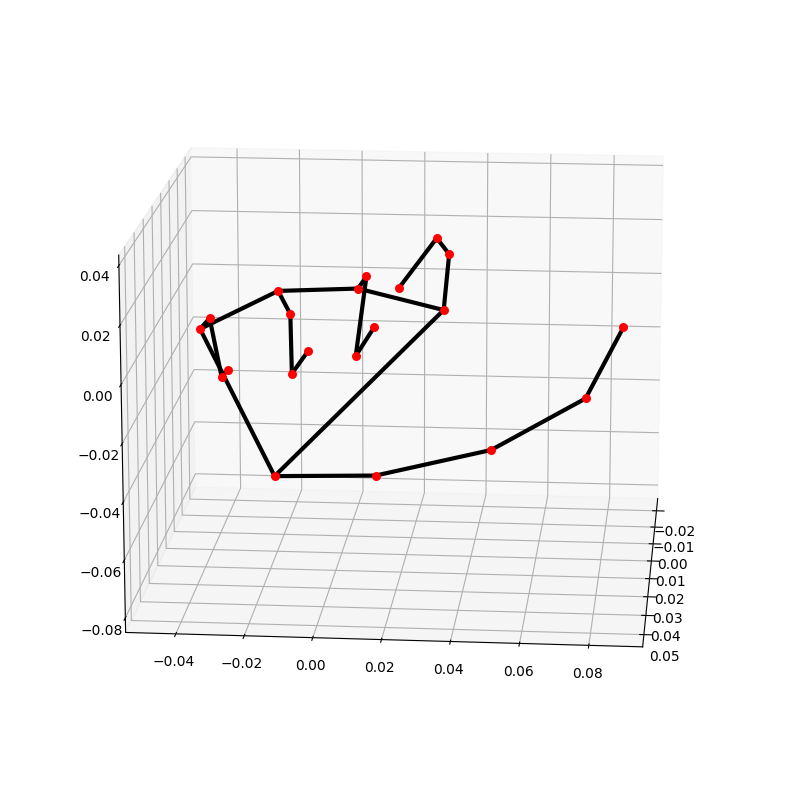

Image: U
Handedness: None
No Landmark Found for U

Image: V
Handedness: None
No Landmark Found for V

Image: W
Handedness: [classification {
  index: 1
  score: 0.5583659410476685
  label: "Right"
}
]


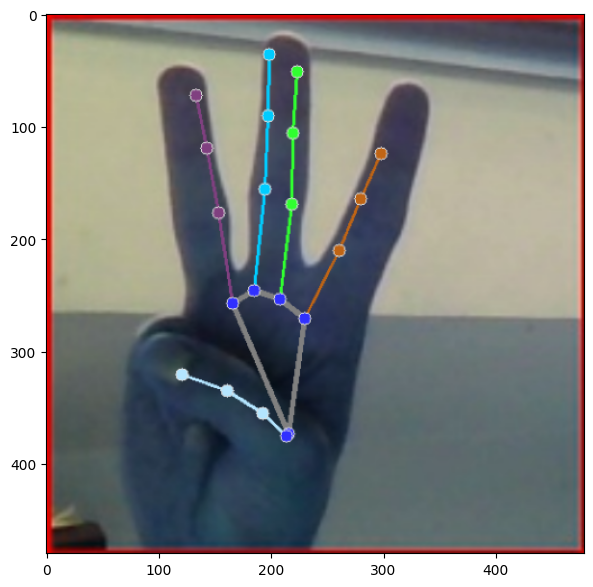

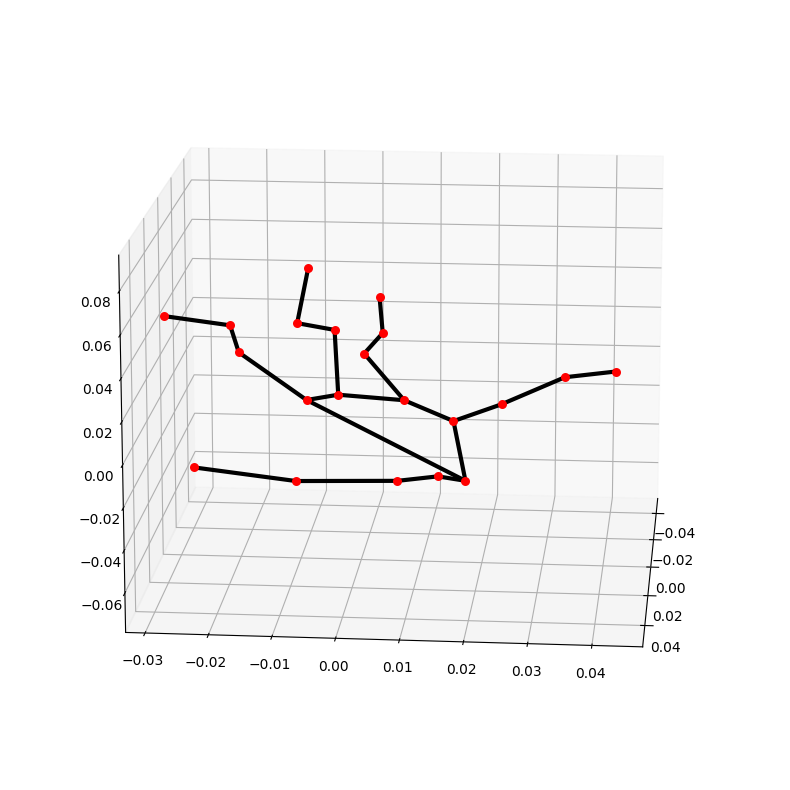

Image: X
Handedness: None
No Landmark Found for X

Image: Y
Handedness: [classification {
  index: 0
  score: 0.9964924454689026
  label: "Left"
}
]


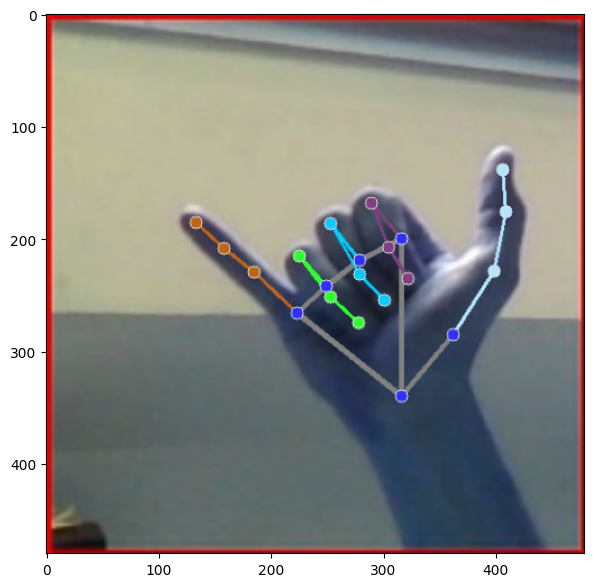

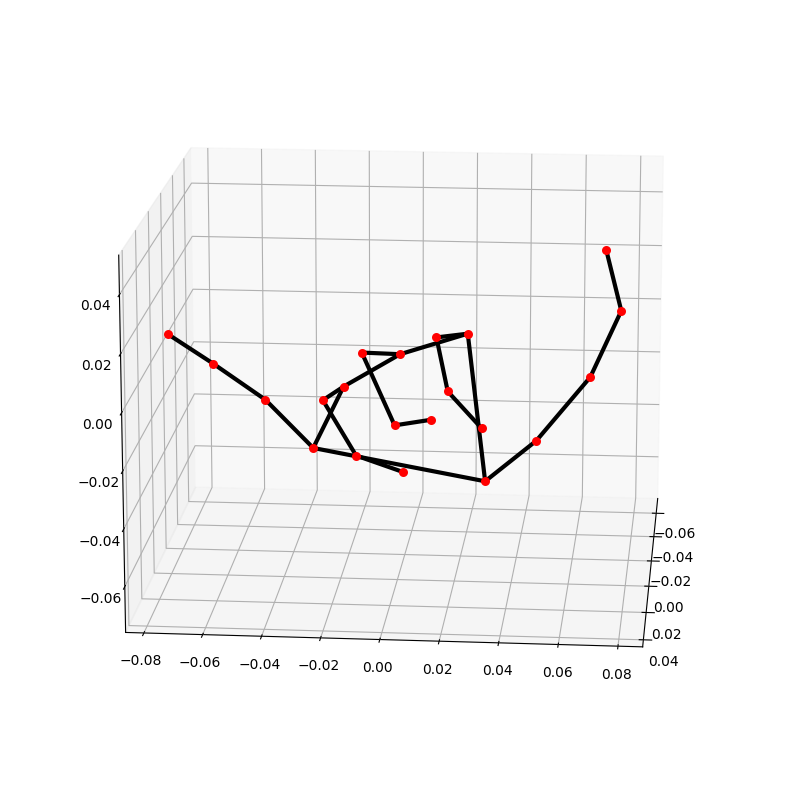

Image: Z
Handedness: None
No Landmark Found for Z

Image: nothing
Handedness: None
No Landmark Found for nothing

Image: space
Handedness: [classification {
  index: 1
  score: 0.9648458361625671
  label: "Right"
}
]


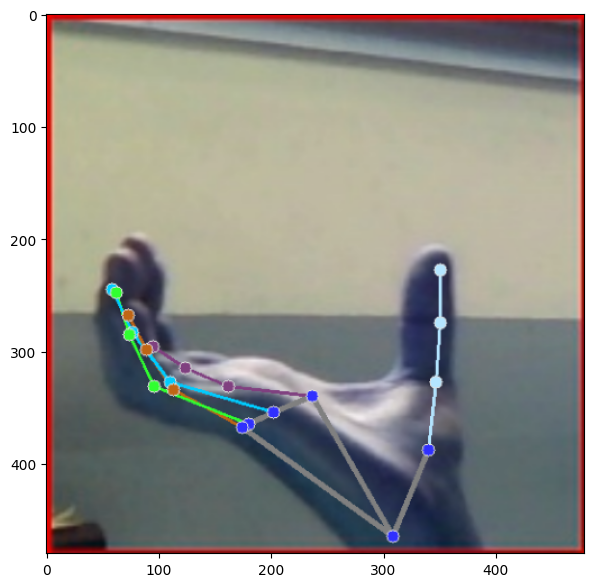

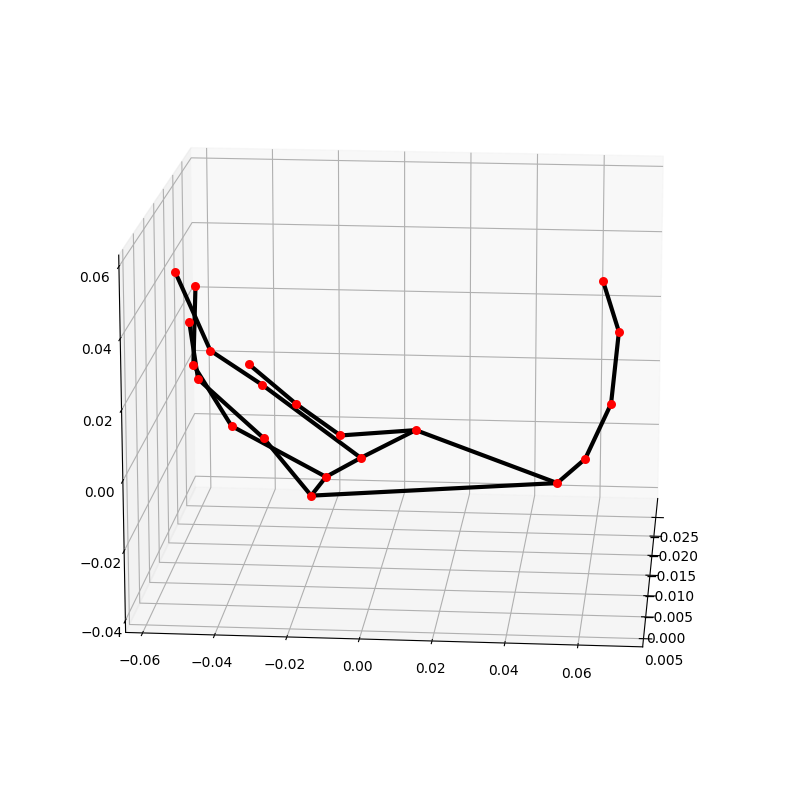

In [40]:
with mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5 ,max_num_hands=1) as hands:
    for name, image in images.items():

        image = cv2.resize(image, (500,500))

        # results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        image_height, image_width = image.shape[:2]

        print("\33[92m"+ "Image: {}".format(name.split("_")[0]) + "\033[0m")
        print('Handedness:', results.multi_handedness)

        if not results.multi_hand_landmarks:
            print("\33[31m"+"No Landmark Found"+"\033[0m"+ " for {}".format(name.split("_")[0]) + "\n")
            continue

        # annotated_image = cv2.flip(image.copy(), 1)
        annotated_image = image.copy()

        for hand_landmarks in results.multi_hand_landmarks:
            # print('hand_landmarks:', hand_landmarks)
            # print(
            #     f'Index finger tip coordinates: (',
            #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
            #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
            # )

            # mp_drawing.draw_landmarks(
            #     annotated_image,
            #     hand_landmarks,
            #     mp_hands.HAND_CONNECTIONS,
            #     landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=4, circle_radius=8),
            #     connection_drawing_spec=mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=4, circle_radius=4))

            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec=get_hand_landmarks_style(),
                connection_drawing_spec=get_hand_connections_style())

        resize_and_show_image(annotated_image)

        if not results.multi_hand_world_landmarks:
            continue
        for hand_world_landmarks in results.multi_hand_world_landmarks:
            mp_drawing.plot_landmarks(
                hand_world_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0,0,255), thickness=2),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,0,0), thickness=3),
                elevation=15,
                azimuth=5)
        # break